# 04/01/21 - This notebook shows h-alpha line (6562 nm) redshifted from source. ie. 
# $\lambda=\lambda_0\times(1+z)$ where $\lambda_0 = 6562$ nm

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt

from pyprojroot import here

autoz_path = str(here())
file_path = f'{autoz_path}/files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'

In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

In [2]:
# load sample csv
samples = pd.read_csv(f'{csv_path}latest/all_samples_latest.csv')
print(samples.columns)

Index(['Unnamed: 0', 'DEC', 'GAMA_ID', 'ID', 'KIDS_ID', 'P1', 'P3', 'R', 'RA',
       'Unnamed: 0_x', 'Unnamed: 0_y', 'cnn_probability',
       'corrected_stellar_mass', 'dlens', 'dsource', 'error',
       'lambdar_log_mstar', 'lambdar_log_mstar_error', 'lambdar_mstar', 'mag',
       'mag_err', 'name', 'normalized_score', 'num_0', 'prob', 'probability',
       'rms', 's*p/10', 'score', 'sigma1', 'sigma2', 'sigma3', 'sigma4',
       'sigma_lens', 'sigma_source', 'template1', 'template2', 'type',
       'type_number', 'z', 'z1', 'z2', 'z_max', 'z_min', 'zlens', 'zphot',
       'zsource'],
      dtype='object')


Text(0, 0.5, 'Count')

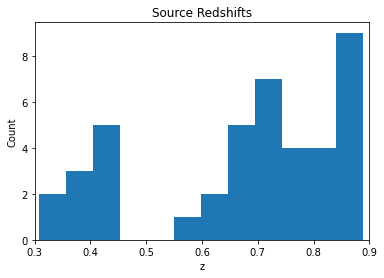

In [3]:
plt.hist(samples.zsource, bins=12)
plt.title('Source Redshifts')
plt.xlabel('z')
plt.xlim(0.3, 0.9)
plt.ylabel('Count')

In [4]:
lambda_halpha = 6562 # nm
samples['halpha_source'] = lambda_halpha * (1 + samples['zsource'])

[10726.676895737648, 11573.82734656334, 11236.286667823792, 11624.952166318893, 12057.099497675896, 11737.719566464424, 12176.13077557087, 10982.645185112953, 12275.932359457016, 11244.88165462017, 12394.345267653465, 10826.143284916878, 10482.442767858505, 11164.88276386261, 12205.470286130905, 11337.96761059761, 11106.455236554146, 11284.117427110672, 11297.072682976723, 8958.406892359257, 8923.632690489292, 8785.779662668705, 8582.013353168964, 9125.460776686668, 9307.31074988842, 9438.264320731163, 12375.364720702171, 9401.037369728088, 11262.30161011219, 11800.005157470703, 10901.89220404625, 11727.066867470741, 10558.59611093998, 12123.646011829376, 12198.259101986885, 12327.865635991096, 11843.865208864212, 10899.369834542274, 9295.327832460403, 12132.769018292427, 9514.423921823502, 11984.60396194458]


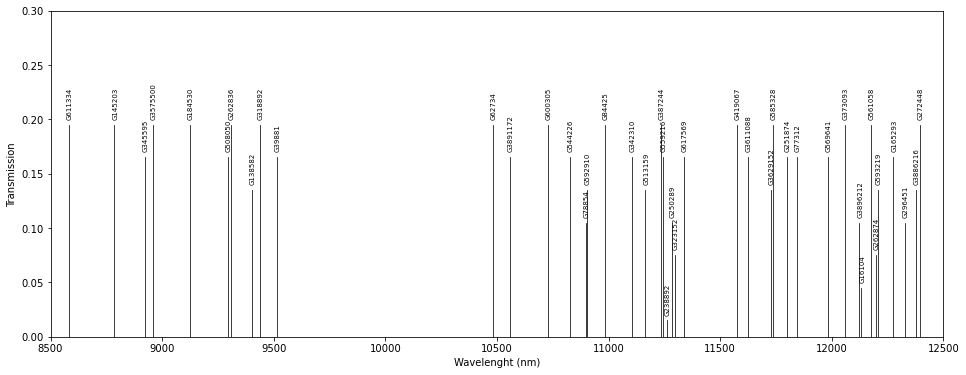

In [110]:
# plot figure
halpha = samples['halpha_source'].sort_values(ascending=True)
gama_ids = samples['GAMA_ID'].astype('int').astype('str')

fig, axs = plt.subplots(figsize=(16,6))
axs.set_xlim(8500, 12500)
axs.set_ylim(0, 0.3)
axs.set_xlabel('Wavelenght (nm)')
axs.set_ylabel('Transmission')

lambdas = []

for i in range(len(halpha)):
    x = halpha[i]
    ymax = 0.65
    lambdas_diff = lambdas - x
    lambdas_close = lambdas_diff[abs(lambdas_diff) < 100]
    ymax = ymax - 0.1*len(lambdas_close)
    axs.axvline(x=halpha[i],
                ymin=0,
                ymax=ymax,
               color='k',
               linewidth='0.75')
        # the x coords of this transformation are data, and the
        # y coord are axes
    lambdas.append(x)
    trans = axs.get_xaxis_transform()
    plt.text(x=halpha[i]-10, y=ymax+0.02, s=f'G{gama_ids[i]}', rotation='vertical', transform=trans, fontsize=7)
    
print(lambdas)

In [127]:
# load in filters
hst_814w = np.genfromtxt(f'{file_path}other/HST_WFC3_UVIS1_F814W_filter.txt', delimiter='')
print(hst_814w)
hst_105w = np.genfromtxt(f'{file_path}other/HST_WFC3_IR_F105W_filter.txt', delimiter='')
hst_125w = np.genfromtxt(f'{file_path}other/HST_WFC3_IR_F125W_filter.txt', delimiter='')

[[6.87189551e+03 2.40194551e-05]
 [6.87200000e+03 2.41694450e-05]
 [6.87300000e+03 2.56047298e-05]
 ...
 [9.91600000e+03 2.55914267e-05]
 [9.91700000e+03 2.46277015e-05]
 [9.91800000e+03 2.36677985e-05]]


[10726.676895737648, 11573.82734656334, 11236.286667823792, 11624.952166318893, 12057.099497675896, 11737.719566464424, 12176.13077557087, 10982.645185112953, 12275.932359457016, 11244.88165462017, 12394.345267653465, 10826.143284916878, 10482.442767858505, 11164.88276386261, 12205.470286130905, 11337.96761059761, 11106.455236554146, 11284.117427110672, 11297.072682976723, 8958.406892359257, 8923.632690489292, 8785.779662668705, 8582.013353168964, 9125.460776686668, 9307.31074988842, 9438.264320731163, 12375.364720702171, 9401.037369728088, 11262.30161011219, 11800.005157470703, 10901.89220404625, 11727.066867470741, 10558.59611093998, 12123.646011829376, 12198.259101986885, 12327.865635991096, 11843.865208864212, 10899.369834542274, 9295.327832460403, 12132.769018292427, 9514.423921823502, 11984.60396194458]


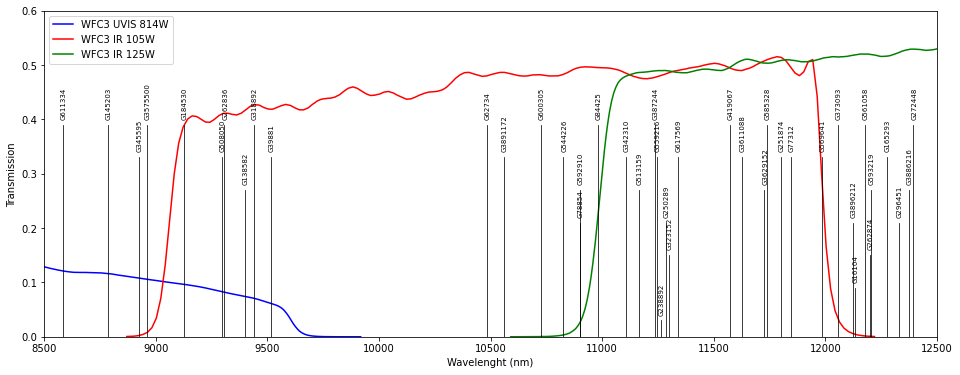

In [129]:
# plot figure
halpha = samples['halpha_source'].sort_values(ascending=True)
gama_ids = samples['GAMA_ID'].astype('int').astype('str')

fig, axs = plt.subplots(figsize=(16,6))
axs.set_xlim(8500, 12500)
axs.set_ylim(0, 0.6)
axs.set_xlabel('Wavelenght (nm)')
axs.set_ylabel('Transmission')

axs.plot(hst_814w[:,0], hst_814w[:,1],
        color='b',
        label='WFC3 UVIS 814W')
axs.plot(hst_105w[:,0], hst_105w[:,1],
        color='r',
        label='WFC3 IR 105W')
axs.plot(hst_125w[:,0], hst_125w[:,1],
        color='g',
        label='WFC3 IR 125W')
axs.legend()

lambdas = []

for i in range(len(halpha)):
    x = halpha[i]
    ymax = 0.65
    lambdas_diff = lambdas - x
    lambdas_close = lambdas_diff[abs(lambdas_diff) < 100]
    ymax = ymax - 0.1*len(lambdas_close)
    axs.axvline(x=halpha[i],
                ymin=0,
                ymax=ymax,
               color='k',
               linewidth='0.75')
        # the x coords of this transformation are data, and the
        # y coord are axes
    lambdas.append(x)
    trans = axs.get_xaxis_transform()
    plt.text(x=halpha[i]-10, y=ymax+0.02, s=f'G{gama_ids[i]}', rotation='vertical', transform=trans, fontsize=7)
    
print(lambdas)

In [121]:
hst_814w[:,1]

array([2.40194551e-05, 2.41694450e-05, 2.56047298e-05, ...,
       2.55914267e-05, 2.46277015e-05, 2.36677985e-05])